<a href="https://colab.research.google.com/github/ismeemaahir/portfolio1/blob/master/200818_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_1%EC%9D%BC%EC%B0%A8%20%EC%A0%95%EB%A6%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn
print(sklearn.__version__)
# sklearn(사이킷런): 파이썬에서 머신러닝 분석을 할 때 유용하게 사용할 수 있는 라이브러리

0.22.2.post1


In [ ]:
#사이킷런에서 자주 사용되는 모듈
# import numpy as np           ## 기초수학 연산 및 행렬계산
# import pandas as pd          ## 데이터프레임 사용
# from sklearn import datasets ## 내장데이터 사용

# from sklearn.datasets import make_classification     ## 분류용 가상 데이터 만들기

# from sklearn.model_selection import train_test_split ## train,test 데이터 분할
# from sklearn.linear_model import LinearRegression    ## 선형 회귀분석
# from sklearn.linear_model import LogisticRegression  ## 로지스틱 회귀분석
# from sklearn.naive_bayes import GaussianNB           ## 나이브 베이즈
# from sklearn import svm                              ## 서포트 벡터 머신 
# from sklearn import tree                             ## 의사결정나무
# from sklearn.ensemble import RandomForestClassifier  ## 랜덤포레스트

# import matplotlib.pyplot as plt                      ## plot 그릴때 사용

- 분류용 가상 데이터 만들기

예시) X, Y = make_classification(
  n_samples=1000, n_features=4,
  n_informative=2, n_redundant=0,
  random_state=0, suffle=False)


#    옵션설명
1. n_sample : 표본 수 (default=100)
2. n_features : 독립변수 수 (default=20)
3. n_informative : 종속변수와 상관관계가 존재하는 독립변수 수 (default=2)
4. n_redundant : 독립변수끼리 종속관계에 있는 독립변수 수 (default=2)
5. n_repeated : 중복 독립변수 수(default=0)
6. n_classes : 종속변수 클래스(라벨) 수 (default=2)
7. n_clusters_per_class :	클래스당 클러스터 수 (default=2)
8. weights :각 클래스에 할당 된 표본 수
9. random_state	: 난수 생성 시드(seed) 번호


**머신러닝 튜토리얼**

## 튜토리얼





### (1)개요
- iris 붓꽃 분류모형을 만든다

### (2) 데이터 불러오기
 - sklearn 패키지 내장데이터 있음

In [7]:
from sklearn.datasets import load_iris
# sklearn 패키지내의 내장데이터 불러오는 코드
iris = load_iris()  #bunch 형태의 데이터셋으로 구성되어 있음
#해당 내장 데이터명을 원하는 이름으로 변환/해당 데이터 내에 열이 제대로 있는지 확인하는것도 좋음

# 데이터=> 독립변수 & 종속변수로 구성
# 독립변수: 인과관계에서 원인에 해당하고 변하지 않음/
            #iris 사례에서는 꽃잎 크기와 관련된 가로축/ 붓꽃 종류와 관련된 세로축 모두가 독립변수
# 종속변수: 최초 데이터값

# 독립변수로 구성된 데이터(.data)
iris_data = iris.data
# 종속변수로 구성된 데이터(.target)
iris_label = iris.target
# 0,50,100은 각각 다른 종류의 붓꽃을 의미함 0,1,2로 도출
print('iris target 값:', iris_label[[0,50,100]])
print('iris target 명:', iris.target_names)

iris target 값: [0 1 2]
iris target 명: ['setosa' 'versicolor' 'virginica']


### (3) 데이터 전처리
-상황: numpy 형태, 테스트
-방법: pandas를 활용해서, 데이터 프레임 만들기

-ref. How to convert a Scikit-learn dataset to a Pandas dataset?(https://stackoverflow.com/questions/38105539/how-to-convert-a-scikit-learn-dataset-to-a-pandas-dataset/46379878#46379878)

In [ ]:
from sklearn import datasets
import pandas as pd
# 구글코랩에 이용하면 굳이 판다스나 넘파이 같은 모듈을 다운받을 필요 없음 
# 사이킷런의 데이터를 판다스의 데이터프레임 구조로 변환하는 방법
# 1.본인 함수 정의해서 변환하는 방법 2. 판다스 데이터 프레임함수 이용하는 방법

# 인덱스와 데이터값을 모두 직접 입력할수 없는 경우
def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df
# 1. def로 함수 정의: def + 변환할 함수 이름(내장데이터):
# 2. df = pd.DataFrame(내장데이터.독립변수(.data), columns=내장데이터.데이터인덱스 이름:.feature_names)    
# 3. df['종속변수']= pd.Series(내장데이터.종속변수(.target))
# 4. return df => 정의

df_iris = sklearn_to_df(datasets.load_iris())
print(df_iris.head(3).to_markdown())
# 바꾸는 명칭= 정의한 함수이름(모듈.내장데이터)
# 위에서 3개 보기

# iris_df = pd.DataFrame(data = iris_data, columns = iris.feature_names)
# iris_df['label'] = iris.target
# print(iris_df.head(3).to_markdown())

|    |   sepal length (cm) |   sepal width (cm) |   petal length (cm) |   petal width (cm) |   target |
|---:|--------------------:|-------------------:|--------------------:|-------------------:|---------:|
|  0 |                 5.1 |                3.5 |                 1.4 |                0.2 |        0 |
|  1 |                 4.9 |                3   |                 1.4 |                0.2 |        0 |
|  2 |                 4.7 |                3.2 |                 1.3 |                0.2 |        0 |


### (4) 데이터 시각화
- 시각화를 위한 전처리

In [ ]:
temp_data= df_iris.copy()
# print(temp_data.info())
원데이터 손상을 방지, 데이터 활용을 위해 처음에 복사를 해둠
# 복사가 제대로 되었는지 확인을 위해 .info()함수를 통해 개요를 파악 


# columns명 바꾸기
temp_data.columns =["sepal_length","sepal_width","petal_length","petal_width ","species"]
#temp_data.info()


# 0 => 'setosa',... 이름 변경
replace_fct = {0:'setosa',1: 'versicolor', 2: 'virginica'}
# map은 리스트의 요소를 지정된 함수로 처리해주는 함수/map은 원본 리스트를 변경하지 않고 새 리스트를 생성
# for 반복문 대신 활용
temp_data['species']=temp_data['species'].map(replace_fct)
print(temp_data.head(3))


   sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4           0.2  setosa
1           4.9          3.0           1.4           0.2  setosa
2           4.7          3.2           1.3           0.2  setosa


- 수치형 데이터, 히스토그램 & 박스플롯 & 산점도

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


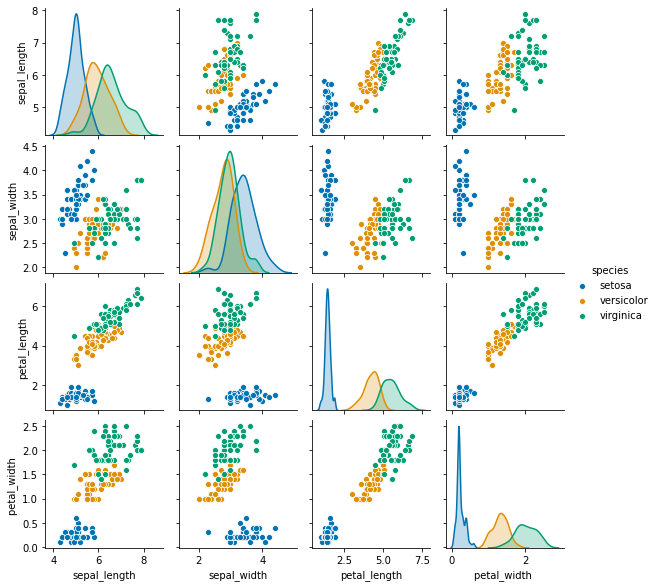

In [ ]:
import seaborn as sns
sns.pairplot(temp_data, hue='species', height=2, palette='colorblind');
 #seaborn 정의하고 활용

### (5)데이터셋 분리
- 학습용 데이터와 테스트용 데이터 분리

In [ ]:
#scikit-learn 패키지 중 model_selection에 데이터 분할을 위한 train_test_split 함수가 있음
# 데이터분할위한 파라미터 선언
from sklearn.model_selection import train_test_split

#훈련용 데이터와 테스트용 데이터를 분리
x_train,x_test,y_train,y_test=train_test_split(iris_data,
                                               iris_label,
                                               test_size = 0.2,
                                               random_state= 1)

- from sklearn.model_selection import train_test_split
train_test_split(arrays, test_size, train_size, random_state, shuffle, stratify)

(1) Parameter

arrays : 분할시킬 데이터를 입력 (Python list, Numpy array, Pandas dataframe 등..

test_size : 테스트 데이터셋의 비율(float)이나 갯수(int) (default = 0.25)
            훈련 데이터/테스트 데이터
train_size : 학습 데이터셋의 비율(float)이나 갯수(int) (default = test_size의 나머지)

random_state : 데이터 분할시 셔플이 이루어지는데 이를 위한 시드값 
(int나 RandomState로 입력)/실험의 재현성을 위한 코드

shuffle : 셔플여부설정 (default = True)

stratify : 지정한 Data의 비율을 유지한다. 예를 들어, Label Set인 Y가 25%의 0과 75%의 1로 이루어진 Binary Set일 때, 
stratify=Y로 설정하면 나누어진 데이터셋들도 0과 1을 각각 25%, 75%로 유지한 채 분할된다.

(2) Return
X_train, X_test, Y_train, Y_test :arrays에 데이터와 레이블을 둘 다 넣었을 경우의 반환이며, 데이터와 레이블의 순서쌍은 유지

X_train, X_test : arrays에 레이블 없이 데이터만 넣었을 경우의 반환

### (6) 머신러닝 모형학습
- 머신러닝 모형을 만듭시다

In [ ]:
# 의사결정나무모듈 정의
from sklearn.tree import DecisionTreeClassifier

#객체생성
dt_clf = DecisionTreeClassifier(random_state=11, max_depth=2)
# max_depth=> 쿼리를 2단계까지 내리라고 명령/ accuracy 차이가 크지 않음
# 규제매개변수, 정규화 과정
# 함수이름= DedcisionTreeClassifier(random_state=셔플을 위한 시드값 ,max_depth= 쿼리명령 내리는 갯수)


#학습수행
dt_clf.fit(x_train,y_train)
# 정의한 함수이름.fit(데이터학습시사용)(정의한 학습용변수 쓰기)
# 학습기계에 data를 학습시킨다. → fit() 메서드
# data를 넣어 결과를 예측시킨다. → predict() 메서드

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=11, splitter='best')

### (7) 모형 테스트
-모형 예측

In [ ]:
from sklearn.metrics import accuracy_score
# 데이터 학습후, 실제 데이터에 적용할때
#모형의 정확도를 예측하기위한 모듈 정의

#함수 활용하기
pred = dt_clf.predict(x_test)
# 새 이름(pred) = 정의한 데이터.predict(예측할때 사용하는 함수)(x_test데이터 사용) 
print('The accuracy of the Decision Tree is: {:.3f}'.format(accuracy_score(pred,y_test)))
# 의사결정나무의 정확도는: 세자리까지 표현 .format(정확도 점수(x데이터 이용한 데이터,y_test데이터 사용))

The accuracy of the Decision Tree is: 0.967


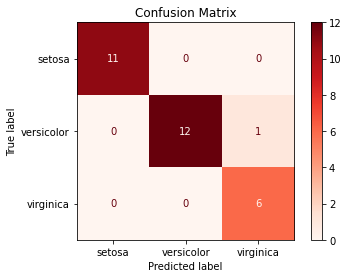

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import plot_confusion_matrix
# 사이킷런의 의사결정나무와 행렬에서 각각의 모듈을 정의

# 시각화 자료의 이름 정의
labels = ['setosa', 'versicolor', 'virginica']
# 이름= plot_confusion_matrix(정의)(대상함수,test데이터들,라벨 명칭,sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import plot_confusion_matrix
# 사이킷런의 의사결정나무와 행렬에서 각각의 모듈을 정의

# 시각화 자료의 이름 정의
labels = ['setosa', 'versicolor', 'virginica']
# 이름= plot_confusion_matrix(정의)(대상함수,test데이터들,라벨 명칭,색상,정규화)
disp = plot_confusion_matrix(dt_clf, 
                             x_test, y_test, 
                             display_labels=labels, 
                             cmap=plt.cm.Reds, 
                             normalize=None)
#시각화 작업
# 정의한 함수이름.ax는 axes를 의미 .이름짓기(set_title)(원하는 이름쓰기)
disp.ax_.set_title('Confusion Matrix');

In [ ]:
# 적합한 모형의 결과를 시각화로 재구성함

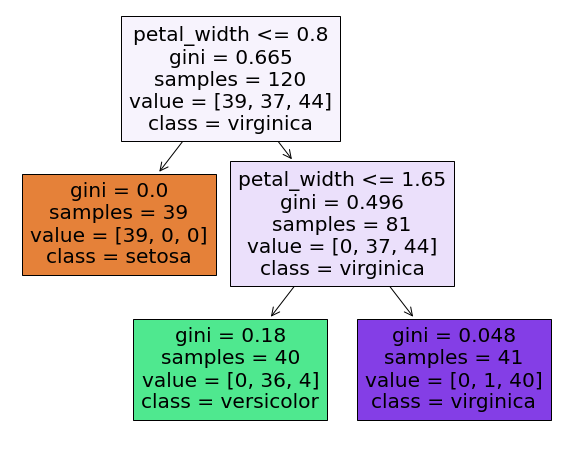

In [ ]:
import matplotlib.pyplot as plt
# 시각화 선언

# 명시적 형변환(explicit type conversion)
# 숫자값=> 문자로 변화
explt_vars=["sepal_length","sepal_width","petal_length","petal_width"]
fct_val = {0: 'setosa',1:'versicolor',2:'virginica'}

plt.figure(figsize = (10,8))
plot_tree(dt_clf, feature_names = explt_vars, class_names = fct_val, filled = True);
# impurity: 불순도(지니계수)=> 1(가장 순수)-(0/40)**2 - (36/40)**2-(4/40)**2
  # => 분류가 잘안될수록 불순도가 높음

## 소결

 - 지금까지 배운 것을 종합해보면 다음과 같이 머신러닝 프로세스를 정리할 수 있다.
 - 데이터 수집: 머신러닝 수행에 앞서 필수적인 데이터를 수집한다.
 - 데이터 처리: 시각화를 위해 간단하게 데이터를 정리한다.
 - 데이터 시각화: 주어진 데이터를 가지고 시각화를 작성한다.
 - 데이터 세트 분리: 데이터를 학습 데이터와 테스트 데이터로 분리한다.
 - 모델 학습: 학습 데이터를 기반으로 ML 알고리즘을 활용한다.
 - 예측 수행: 학습된 모델을 테스트 데이터로 확인 후 정확도를 확인한다.
 - 평가: 이렇게 예측된 결과값과 테스트 데이터의 실제 결과값을 비교해 ML 모델 성능을 평가한다.
